In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from configs.config_object import ConfigObject
from grid_and_bathy import get_dz_grid

In [51]:
config = ConfigObject('../config.json')
direction = 'west'
ref_date = datetime(2025, 1, 1)

In [52]:
vel_variable = 'u'
if direction == 'south' or direction == 'north':
    vel_variable = 'v'

In [53]:
base_output_folder = f'../99-output'
binary_folder = os.path.join(base_output_folder, config.simulation_name, "binary_data")
file_name = f"bc_{direction}_{vel_variable}.bin"
file_path = os.path.join(binary_folder, file_name)

In [54]:
dz_grid = get_dz_grid(os.path.join(config.paths.grid_folder_path, 'dz.csv'))

In [55]:
with open(file_path, 'rb') as fid:
    binary_data = np.fromfile(fid, dtype='<f8')

In [56]:
nx = config.Nx
if direction == 'east' or direction == 'west':
    nx = config.Ny
nz = len(dz_grid)
nt = len(binary_data) / nx / nz

print(f'nx = {nx}, nz = {nz}, nt = {nt}' )

nx = 15, nz = 10, nt = 2170.0


In [57]:
date_list = []
for i in range(0, int(nt)):
    current_date = ref_date + timedelta(hours=i)
    date_list.append(current_date)

In [58]:
bin_array = np.reshape(binary_data, (int(nt),int(nz),int(nx)))

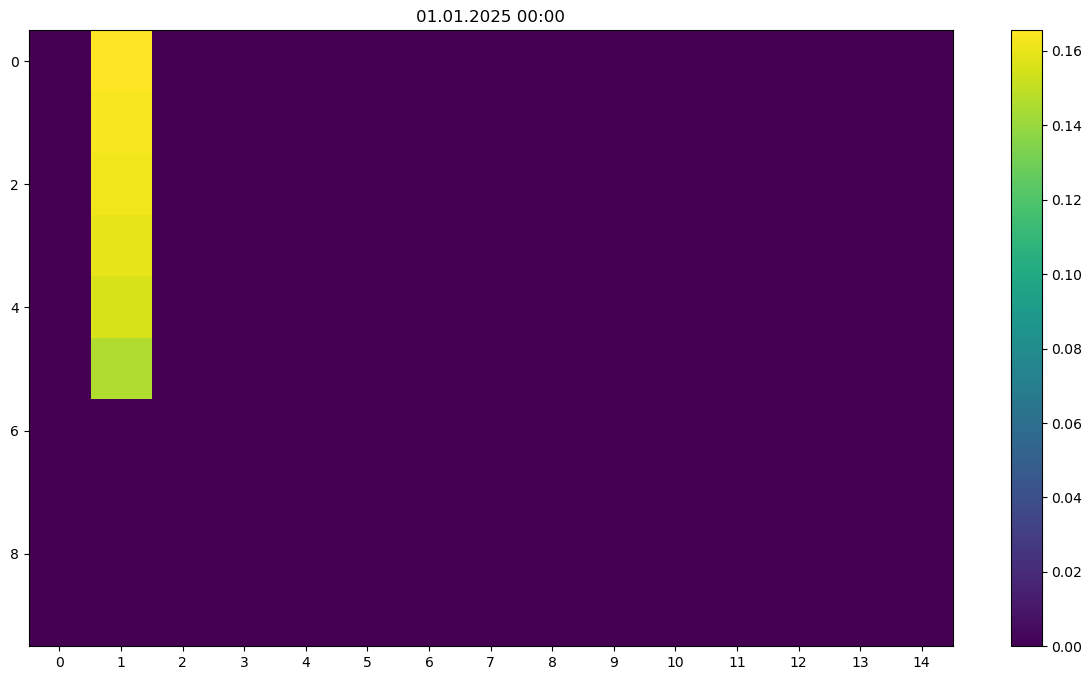

In [59]:
i_time = 0
fig = plt.figure(figsize=(15,8))
plt.imshow(bin_array[i_time,:,:])
plt.xticks(np.arange(0, nx, 1), np.arange(0, nx, 1))
plt.title(date_list[i_time].strftime('%d.%m.%Y %H:%M'))
plt.colorbar()
plt.show()